I'm gonna overwrite a lot of this notebook's old content. I changed the way I'm calculating wt, and wanna test that my training worked. 

In [103]:
from pearce.emulator import OriginalRecipe, ExtraCrispy, SpicyBuffalo
from pearce.mocks import cat_dict
import numpy as np
from os import path

In [104]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [105]:
training_file = '/u/ki/swmclau2/des/PearceRedMagicXiCosmoFixedNd.hdf5'
test_file = '/u/ki/swmclau2/des/PearceRedMagicXiCosmoFixedNd_Test.hdf5'
em_method = 'gp'
split_method = 'random'

In [106]:
a = 1.0
z = 1.0/a - 1.0

In [107]:
fixed_params = {'z':z}#, 'r':24.06822623}

In [108]:
np.random.seed(0)
emu = SpicyBuffalo(training_file, method = em_method, fixed_params=fixed_params,
                 custom_mean_function = 'linear', downsample_factor = 0.1)

In [109]:
for pname in emu.get_param_names():
    print pname, emu.get_param_bounds(pname)

ombh2 (0.02066455, 0.02371239)
omch2 (0.1012181, 0.13177679999999997)
w0 (-1.399921, -0.5658486)
ns (0.9278462, 0.9974495999999999)
ln10As (3.0009, 3.179424)
H0 (61.69472, 74.76751999999999)
Neff (2.62125, 4.27875)
logM0 (13.1, 16.1)
sigma_logM (0.05, 0.3)
logM1 (13.1, 15.1)
alpha (0.8, 1.2)


In [110]:
emu.scale_bin_centers

array([ 0.09581734,  0.13534558,  0.19118072,  0.27004994,  0.38145568,
        0.53882047,  0.76110414,  1.07508818,  1.51860241,  2.14508292,
        3.03001016,  4.28000311,  6.04566509,  8.53972892, 12.06268772,
       17.0389993 , 24.06822623, 33.99727318])

In [111]:
rbins = np.logspace(-1.1, 1.6, 19)
print (rbins[1:]+rbins[:-1])/2

[ 0.09581733  0.13534558  0.19118072  0.27004994  0.38145568  0.53882047
  0.76110414  1.07508817  1.51860241  2.14508292  3.03001016  4.28000311
  6.04566509  8.53972892 12.06268772 17.0389993  24.06822623 33.99727318]


In [122]:
#v = [  5.30324096,  -2.92565173,  -4.42429766,  -2.48246708,  10.0699553,                                                           
#  -8.69248089,   0.15083459,  -4.72773171,   1.49655743,   1.17087069,                                                                 
#   0.97997249,  -1.91976981,   7.17709699, -10.26944746,  10.37865121,                                                                 
#   0.50210416,  12.01525603,   5.89975769,   4.78413158,  -1.33582408,                                                                 
#  -9.94571436,   6.50103759,   9.70125021, -11.7173251,   -0.10738552] 

#v = [-12.,          -5.56039378,   5.01999226,   9.63986449, -12.,
# -12.,          -2.13397232,   7.90203306, -12.,           0.51574787,
#   7.25074046,  -1.28201782,   2.84486642, -12.,         -12.,
#  12.,          -7.75414731,  12.,          12.,         -12.,
#   5.15929851, -12.,           0.53369134,  -3.81346879,  -6.9684267, ]

#v = [ -1.14028239, -12.,          -8.08712614 , -1.51590059 ,  2.66822232,
# -12.,         -10.17631757,   6.17448276,   6.2380102,  -12.,
#  -3.63076923,  -1.3260091,    1.84463374,  -2.57120539,   0.42652469,
#   0.94596673,   2.04145112,  -5.13442469,  12.,           8.86492205,
# -12.,           2.44659378,  12.,           2.10889078,   9.36958256]

v = [ 12. ,         12. ,         12.  ,        12.   ,       12.     ,     12.,
  11.67920429 ,  6.81656135 , 12.   ,        1.92715272 , 12.    ,       7.72884642,
  12.,        -12.     ,      2.57697301,  12. ,          8.85016763,
   9.96558899 ,  6.24704116 , 12.      ,    12.   ,      -12.    ,     -12. ,        -12.,
  12.,       ]

v = np.ones_like(v)*10.0

#[ -8.16992654,   8.67223223,  -2.21244202,  -8.9034059,    2.12923655,
#  -9.85755136,   8.6699058,    1.24032812,  -0.41040494 ,  1.93942663,
#   3.70688402,   5.53623883,  10.27060377,  -8.96397854,  -1.54633767,
#   6.72846738,  -9.38415988,  -9.68900453,  -3.5219898,   -9.2396184,
#  10.60952486,  -2.12807193,  -9.92944798,  -2.87456867,  -8.28144359]

#[-2.30321746, -6.,          2.74986581, -0.59132415,  0.74564814, -1.47243557,
#5.38958859,  2.36982126,  5.35110678,  1.6798139,   6.,          2.82272942,
#6.        ]

#[ 6.         -6.         -2.95890662 -6.         -3.63039154  6.
# -0.93930637 -6.         -6.          2.2162459   6.          2.75175138
#  5.09211467]

In [123]:
if hasattr(emu, "_emulator"):
    emu._emulator.set_parameter_vector(v) 
    emu._emulator.recompute()
else:
    for _emulator in emu._emulators:
        _emulator.set_parameter_vector(v)
        _emulator.recompute()

In [124]:
params = {}
for pname in emu.get_param_names():
    if pname == 'r':
        continue
    low, high = emu.get_param_bounds(pname)
    params[pname] = np.random.uniform(low, high)
    
print params

{'logM1': 13.61751068781637, 'Neff': 3.930543451302447, 'logM0': 14.318942327782366, 'sigma_logM': 0.22736519513376846, 'H0': 70.41080143279297, 'w0': -1.091813221254576, 'omch2': 0.12550166989133063, 'ln10As': 3.135923294691914, 'alpha': 0.9128844786433963, 'ns': 0.98890455673126, 'ombh2': 0.020886579765107192}


In [125]:
gof = emu.goodness_of_fit(test_file, statistic = 'log_frac')
#print gof.mean(), np.median(gof)
for g in gof:
    print g.mean(), np.median(g)

0.02519866827497664 0.019344003530173945
0.030461854480206742 0.01745101830127774
0.19922935655212246 0.02289677603039387
0.1452116777510077 0.017021701400649954
0.38638406773200074 0.02716486087850084
0.2620261983543134 0.02362066463268963
0.23632864110086046 0.02203706644383192
0.045139300625225906 0.025709326829954346
0.030581190126319116 0.02039438334961379
0.029327106536165697 0.019225118156929608
0.0387567697895972 0.03172452869484488
0.03840813879216604 0.030694246727160777
0.03421458521193084 0.024814481630690582
0.06359606839511932 0.05383803464735682
0.23362940016996242 0.14145091078589717
0.20421327867146766 0.06140319587029605
2.659109959725368 0.02623641142607916
0.06842386387182028 0.0188005959032079


In [116]:
#print g.mean(), np.median(g)

In [117]:
pred_y, y = emu.goodness_of_fit(test_file, statistic = None)
#print gof.mean(), np.median(gof)

([array([   0.,    0.,    0.,   18.,  295.,  474.,  754.,  977., 1009.,
          890.]),
  array([0.00e+00, 0.00e+00, 1.00e+00, 2.47e+02, 3.86e+02, 5.70e+02,
         8.55e+02, 9.96e+02, 1.10e+03, 4.69e+02]),
  array([   0.,   97.,  192.,  374.,  460.,  653.,  977., 1009., 1047.,
          140.]),
  array([   3.,   42.,  285.,  396.,  527.,  815., 1004.,  990.,  788.,
           33.]),
  array([  6.,  97., 315., 430., 624., 960., 992., 900., 494.,   7.]),
  array([  9., 142., 330., 506., 797., 977., 967., 800., 212.,   0.]),
  array([ 23., 181., 369., 615., 934., 974., 808., 667.,  68.,   0.]),
  array([   0.,    0.,    0., 3773., 1137.,  948.,  778.,  354.,   10.,
            0.]),
  array([0.000e+00, 0.000e+00, 0.000e+00, 3.913e+03, 1.477e+03, 8.040e+02,
         6.660e+02, 1.390e+02, 1.000e+00, 0.000e+00]),
  array([   0.,    0.,    0., 4702., 1175.,  798.,  308.,   17.,    0.,
            0.]),
  array([0.000e+00, 0.000e+00, 0.000e+00, 5.568e+03, 9.500e+02, 4.180e+02,
         6.3

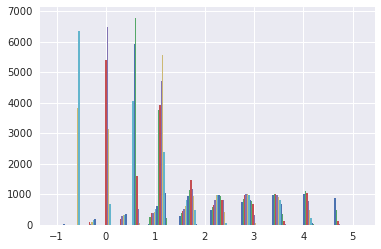

In [118]:
plt.hist(y)

([array([   0.,    0.,    0.,    3.,  260.,  513.,  780.,  978., 1061.,
          822.]),
  array([   0.,    0.,    0.,  114.,  505.,  595.,  861.,  982., 1175.,
          392.]),
  array([  32.,   30.,   76.,  464.,  511.,  662.,  974., 1001., 1069.,
          130.]),
  array([   0.,    0.,  216.,  484.,  559.,  820.,  985., 1012.,  776.,
           31.]),
  array([  0.,  31., 320., 452., 671., 973., 970., 962., 445.,   1.]),
  array([  0.,  69., 374., 517., 839., 969., 943., 852., 177.,   0.]),
  array([  2., 126., 398., 644., 957., 963., 843., 655.,  51.,   0.]),
  array([   0.,    0.,  525., 3238., 1192.,  904.,  778.,  334.,   29.,
            0.]),
  array([   0.,    0.,    0., 3858., 1520.,  854.,  612.,  156.,    0.,
            0.]),
  array([0.00e+00, 0.00e+00, 1.00e+00, 4.65e+03, 1.23e+03, 8.05e+02,
         2.89e+02, 2.50e+01, 0.00e+00, 0.00e+00]),
  array([   0.,    0.,   31., 5457., 1046.,  399.,   67.,    0.,    0.,
            0.]),
  array([   0.,    0., 3446., 2994., 

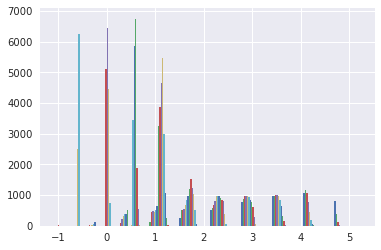

In [119]:
plt.hist(pred_y)

([array([    0.,     0.,    77.,   543.,  2066.,  9434., 12632.,   833.,
            14.,     0.]),
  array([0.0000e+00, 1.0000e+00, 1.2900e+02, 7.2500e+02, 2.6540e+03,
         9.6090e+03, 1.3233e+04, 1.3290e+03, 7.7000e+01, 1.4000e+01]),
  array([1.0000e+00, 3.2000e+01, 2.6100e+02, 9.3000e+02, 3.3650e+03,
         9.0480e+03, 1.3805e+04, 1.8850e+03, 1.2300e+02, 1.4000e+01]),
  array([3.000e+00, 3.800e+01, 2.730e+02, 8.540e+02, 3.181e+03, 9.100e+03,
         1.375e+04, 1.792e+03, 1.130e+02, 0.000e+00]),
  array([1.0000e+00, 1.5000e+01, 2.0200e+02, 7.6100e+02, 2.8770e+03,
         9.0450e+03, 1.3415e+04, 1.4720e+03, 6.8000e+01, 0.0000e+00]),
  array([1.0000e+00, 1.7000e+01, 1.7300e+02, 7.7600e+02, 2.8060e+03,
         8.9690e+03, 1.3192e+04, 1.5070e+03, 6.2000e+01, 0.0000e+00]),
  array([2.0000e+00, 2.1000e+01, 1.7800e+02, 6.9800e+02, 2.6510e+03,
         9.0370e+03, 1.2856e+04, 1.4720e+03, 5.3000e+01, 0.0000e+00]),
  array([0.0000e+00, 0.0000e+00, 0.0000e+00, 2.5000e+02, 4.8620e+03,
 

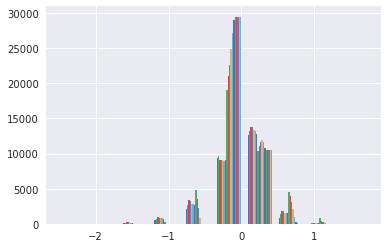

In [120]:
plt.hist(emu.y)

In [121]:
plt.hist(np.log10(gof));

AttributeError: 'numpy.ndarray' object has no attribute 'log10'

In [ ]:
plt.hist(emu.y)

In [ ]:
for i in xrange(50):    
    params = {}

    for pname in emu.get_param_names():
        if pname == 'r':
            continue
        low, high = emu.get_param_bounds(pname)
        params[pname] = np.random.uniform(low, high)
    pred_y = emu.emulate(params)[0]
    print pred_y
    #print params

In [ ]:
for i, (g, r) in enumerate(zip(gof, emu.scale_bin_centers)):
    print r, g.mean(), np.median(g)
    #plt.hist(np.log10(g))
    #plt.show()

In [ ]:
n_cosmo_params = 7
loo_cosmo = emu.x[0, 0,  :n_cosmo_params]

loo_cosmo_idxs = np.all(emu.x[:, :,:n_cosmo_params] == loo_cosmo, axis =2)
train_x, train_y, train_yerr = emu.x[~loo_cosmo_idxs, :], emu.y[ ~loo_cosmo_idxs], emu.yerr[ ~loo_cosmo_idxs]
test_x, test_y, test_yerr = emu.x[loo_cosmo_idxs, :], emu.y[loo_cosmo_idxs], emu.yerr[loo_cosmo_idxs]

In [ ]:
model = emu._emulator
model.compute(train_x, train_yerr)

In [ ]:
pred_y = model.predict(train_y, test_x, False, False, False)*emu._y_std + emu._y_mean


In [ ]:
np.mean(np.abs((pred_y-test_y)/test_y))
#np.mean(np.abs((pred_y-train_y)/train_y))

In [ ]:
        queue_skipper: True
        system: sherlock
        n_jobs: 400
        max_time: 6
resids = np.abs(emu.y*emu._y_std+emu._y_mean - ypred)

In [ ]:
np.mean(resids/(emu.y*emu._y_std+emu._y_mean))

In [ ]:
ypred.mean(), emu._y_mean

In [ ]:
test_gof = emu.goodness_of_fit(test_file, statistic = 'log_frac')
print test_gof.mean()

In [ ]:
test_gof = emu.goodness_of_fit(test_file, statistic = 'frac')
print test_gof.mean()

In [ ]:
plt.hist(np.log10(test_gof));

In [ ]:
test_x

In [ ]:
(emu.x*emu._x_std) + emu._x_mean

In [ ]:
emu.get_param_names()

In [ ]:
test_x_white, test_y_white = (test_x - emu._x_mean)/(emu._x_std + 1e-5), (test_y - emu._y_mean)/(emu._y_std + 1e-5)

In [ ]:
model = emu._emulator

In [ ]:
pred_y_white = model.predict(emu.y, test_x_white, False, False, False)

In [ ]:
pred_y = pred_y_white*emu._y_std + emu._y_mean

In [ ]:
plt.plot(pred_y[:100], label = 'pred')
plt.plot(test_y[:100], label = 'truth')

plt.legend(loc = 'best')

In [ ]:
test_y.mean(), emu._y_mean, pred_y.mean()

In [ ]:
test_y.std(), emu._y_std, pred_y.std()

In [ ]:
plt.hist(pred_y_white, bins = np.linspace(-3, 3, 100), label = 'Pred')
plt.hist(test_y_white, bins = np.linspace(-3, 3, 100), label = 'Test', alpha = 0.4);
plt.legend(loc = 'best')